<a href="https://colab.research.google.com/github/NavedAFZ/NLP/blob/master/Topic_modeling_naive_byes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai
from fastai.text import * 

In [2]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [4]:
from fastai import *
from fastai.text import *
from fastai.utils.mem import GPUMemTrace #call with mtrace

In [5]:
#A tensor is a container which can house data in N dimensions, along with its linear operations

In [6]:
import sklearn.feature_extraction.text as sklearn_text
import pickle

#Preview the sample IMDb data set

In [7]:
?? URLs



In [8]:
path = untar_data(URLs.IMDB_SAMPLE)
path


PosixPath('/root/.fastai/data/imdb_sample')

In [9]:
df = pd.read_csv(path/'texts.csv')
df.head()


,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


#Extract the movie reviews from the sample IMDb data set.
#We will be using TextList from the fastai library:

In [10]:
# throws `BrokenProcessPool' Error sometimes. Keep trying `till it works!

count = 0
error = True
while error:
    try: 
        # Preprocessing steps
        movie_reviews = (TextList.from_csv(path, 'texts.csv', cols='text')
                         .split_from_df(col=2)
                         .label_from_df(cols=0))
        error = False
        print(f'failure count is {count}\n')    
    except: # catch *all* exceptions
        # accumulate failure count
        count = count + 1
        print(f'failure count is {count}')

failure count is 0



#Exploring IMDb review data

In [11]:
movie_reviews

LabelLists;

Train: LabelList (800 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj but it is hard to watch , because there is n

#Reviews are composed of lists of tokens. In NLP, a token is the basic unit of processing (what the tokens are depends on the application and your choices). Here, the tokens mostly correspond to words or punctuation, as well as several special tokens, corresponding to unknown words, capitalization, etc

In [12]:
movie_reviews.train

LabelList (800 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj but it is hard to watch , because there is no good end to a situ

In [13]:
movie_reviews.train.x[0].text

"xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !"

In [14]:
movie_reviews.train.x[1].text


'xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . \n \n  xxmaj but it is hard to watch , because there is no good end to a situation like the one presented . xxmaj it is now xxunk to blame the xxmaj british for setting xxmaj hindus and xxmaj muslims against each other , and then xxunk xxunk them into two countries . xxmaj there is some merit in this view , but it \'s also true that no one forced xxmaj hindus and xxmaj muslims in the region to xxunk each other as they did around the time of partition . xxmaj it seems more likely that the xxmaj british simply saw the xxunk between the xxunk and were clever enough to exploit them to their own ends . \n \n  xxmaj th

In [15]:
len(movie_reviews.train.x[0].text)

511

In [16]:
movie_reviews.train.x[0].data

array([   2,    5, 4619,   25, ...,   10,    5,    0,   52])

In [17]:
movie_reviews.train.x[0].text.split()

['xxbos',
 'xxmaj',
 'un',
 '-',
 'xxunk',
 '-',
 'believable',
 '!',
 'xxmaj',
 'meg',
 'xxmaj',
 'ryan',
 'does',
 "n't",
 'even',
 'look',
 'her',
 'usual',
 'xxunk',
 'lovable',
 'self',
 'in',
 'this',
 ',',
 'which',
 'normally',
 'makes',
 'me',
 'forgive',
 'her',
 'shallow',
 'xxunk',
 'acting',
 'xxunk',
 '.',
 'xxmaj',
 'hard',
 'to',
 'believe',
 'she',
 'was',
 'the',
 'producer',
 'on',
 'this',
 'dog',
 '.',
 'xxmaj',
 'plus',
 'xxmaj',
 'kevin',
 'xxmaj',
 'kline',
 ':',
 'what',
 'kind',
 'of',
 'suicide',
 'trip',
 'has',
 'his',
 'career',
 'been',
 'on',
 '?',
 'xxmaj',
 'xxunk',
 '...',
 'xxmaj',
 'xxunk',
 '!',
 '!',
 '!',
 'xxmaj',
 'finally',
 'this',
 'was',
 'directed',
 'by',
 'the',
 'guy',
 'who',
 'did',
 'xxmaj',
 'big',
 'xxmaj',
 'xxunk',
 '?',
 'xxmaj',
 'must',
 'be',
 'a',
 'replay',
 'of',
 'xxmaj',
 'jonestown',
 '-',
 'hollywood',
 'style',
 '.',
 'xxmaj',
 'xxunk',
 '!']

# The IMDb Vocabulary

#The vocab object is a kind of reversible dictionary that translates back and forth between tokens and their integer representations. It has two methods of particular interest: stoi and itos, which stand for string-to-index and index-to-string

In [18]:
movie_reviews.vocab.stoi.items()

dict_items([('xxunk', 0), ('xxpad', 1), ('xxbos', 2), ('xxeos', 3), ('xxfld', 4), ('xxmaj', 5), ('xxup', 6), ('xxrep', 7), ('xxwrep', 8), ('the', 9), ('.', 10), (',', 11), ('and', 12), ('a', 13), ('of', 14), ('to', 15), ('is', 16), ('it', 17), ('in', 18), ('i', 19), ('that', 20), ('this', 21), ('"', 22), ("'s", 23), ('\n \n ', 24), ('-', 25), ('was', 26), ('as', 27), ('for', 28), ('movie', 29), ('with', 30), ('but', 31), ('film', 32), ('you', 33), (')', 34), ('on', 35), ('(', 36), ("n't", 37), ('are', 38), ('he', 39), ('his', 40), ('not', 41), ('have', 42), ('be', 43), ('one', 44), ('they', 45), ('all', 46), ('at', 47), ('by', 48), ('an', 49), ('from', 50), ('like', 51), ('!', 52), ('so', 53), ('who', 54), ('there', 55), ('about', 56), ('just', 57), ('out', 58), ('if', 59), ('or', 60), ('do', 61), ("'", 62), ('what', 63), ('her', 64), ('has', 65), ('some', 66), ('more', 67), ('good', 68), ('when', 69), ('up', 70), ('very', 71), ('?', 72), ('she', 73), ('would', 74), ('no', 75), ('reall

In [19]:
movie_reviews.vocab.itos

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 '.',
 ',',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'that',
 'this',
 '"',
 "'s",
 '\n \n ',
 '-',
 'was',
 'as',
 'for',
 'movie',
 'with',
 'but',
 'film',
 'you',
 ')',
 'on',
 '(',
 "n't",
 'are',
 'he',
 'his',
 'not',
 'have',
 'be',
 'one',
 'they',
 'all',
 'at',
 'by',
 'an',
 'from',
 'like',
 '!',
 'so',
 'who',
 'there',
 'about',
 'just',
 'out',
 'if',
 'or',
 'do',
 "'",
 'what',
 'her',
 'has',
 'some',
 'more',
 'good',
 'when',
 'up',
 'very',
 '?',
 'she',
 'would',
 'no',
 'really',
 'were',
 'their',
 'my',
 'had',
 'time',
 'can',
 'only',
 'which',
 'even',
 'see',
 'story',
 'me',
 'into',
 'did',
 ':',
 'well',
 'we',
 'will',
 'does',
 'than',
 'also',
 'get',
 '...',
 'people',
 'other',
 'bad',
 'been',
 'could',
 'first',
 'much',
 'how',
 'most',
 'any',
 'because',
 'two',
 'then',
 'great',
 'him',
 'its',
 'too',
 'made',
 'them',
 'after',


In [20]:
print('itos ', 'length ',len(movie_reviews.vocab.itos),type(movie_reviews.vocab.itos) )
print('stoi ', 'length ',len(movie_reviews.vocab.stoi),type(movie_reviews.vocab.stoi) )

itos  length  6008 <class 'list'>
stoi  length  19159 <class 'collections.defaultdict'>


#Note that stoi (string-to-int) is larger than itos (int-to-string)

In [21]:
print(f'len(stoi) = {len(movie_reviews.vocab.stoi)}')
print(f'len(itos) = {len(movie_reviews.vocab.itos)}')
print(f'len(stoi) - len(itos) = {len(movie_reviews.vocab.stoi) - len(movie_reviews.vocab.itos)}')

len(stoi) = 19159
len(itos) = 6008
len(stoi) - len(itos) = 13151


#This is because many words map to unknown. We can confirm here:

In [22]:
unk = []
for word, num in movie_reviews.vocab.stoi.items():
    if num==0:
        unk.append(word)

In [23]:
unk

['xxunk',
 'bleeping',
 'pert',
 'ticky',
 'schtick',
 'whoosh',
 'banzai',
 'chill',
 'wooofff',
 'cheery',
 'superstars',
 'fashionable',
 'cruelly',
 'separating',
 'mistreat',
 'tensions',
 'religions',
 'baseness',
 'nobility',
 'puro',
 'disowned',
 'option',
 'faults',
 'dignified',
 'realisation',
 'reconciliation',
 'mrs',
 'iyer',
 'heartbreaking',
 'histories',
 'frankness',
 'starters',
 'montage',
 'swearing',
 'halestorm',
 'korea',
 'concentrate',
 'pic',
 'elude',
 'characteristics',
 'blathered',
 'brassed',
 'declaration',
 'peck',
 'garnered',
 'fearless',
 'tempered',
 'humane',
 'tails',
 'slighted',
 'slater',
 'barrage',
 'underway',
 'operating',
 'tag',
 'dorff',
 'reid',
 'continually',
 'revel',
 'nra',
 'benton',
 'slate',
 'penal',
 'vengeful',
 'seed',
 'backbone',
 'dismal',
 'fortunate',
 'ds',
 'tmob',
 'autographed',
 'intercepted',
 'lectured',
 'reprints',
 'comicon',
 'attendees',
 'blackhawk',
 'insisted',
 'jumped',
 'apologized',
 'wishing',
 'se

#Map the movie reviews into a vector space

In [24]:
print(f'There are {len(movie_reviews.vocab.itos)} unique tokens in the IMDb review sample vocabulary')
print(f'The numericalized token values run from {min(movie_reviews.vocab.stoi.values())} to {max(movie_reviews.vocab.stoi.values())} ')

There are 6008 unique tokens in the IMDb review sample vocabulary
The numericalized token values run from 0 to 6007 


Each review can be mapped to a 6016-dimensional embedding vector whose indices correspond to the numericalized tokens, and whose values are the number of times the corresponding token appeared in the review. To do this efficiently we use Counters.

In [25]:
TokenCounter = lambda review_index : Counter((movie_reviews.train.x)[review_index].data)
TokenCounter(1).items()

dict_items([(2, 1), (5, 33), (21, 5), (16, 15), (13, 6), (597, 1), (92, 1), (25, 5), (117, 1), (32, 4), (10, 19), (9, 27), (127, 1), (11, 21), (249, 2), (12, 16), (362, 1), (199, 1), (38, 3), (46, 2), (105, 1), (1275, 1), (316, 1), (68, 2), (116, 1), (164, 3), (17, 7), (692, 1), (406, 1), (18, 9), (69, 2), (222, 1), (162, 1), (2739, 1), (0, 22), (55, 7), (75, 4), (76, 1), (207, 2), (518, 1), (1667, 1), (94, 1), (43, 4), (1546, 1), (455, 1), (95, 1), (49, 1), (430, 1), (335, 1), (30, 3), (24, 5), (31, 5), (269, 2), (15, 11), (126, 1), (110, 1), (148, 3), (971, 2), (51, 1), (44, 2), (1448, 1), (172, 1), (1802, 1), (748, 2), (28, 4), (972, 1), (3780, 3), (2740, 3), (526, 1), (236, 2), (101, 2), (112, 2), (118, 2), (89, 1), (111, 1), (3781, 1), (66, 1), (3198, 1), (560, 1), (23, 1), (97, 4), (264, 1), (20, 9), (769, 1), (3782, 1), (27, 2), (45, 2), (90, 1), (203, 1), (81, 1), (14, 5), (3199, 2), (202, 1), (67, 2), (2419, 1), (265, 1), (248, 1), (166, 2), (77, 2), (1003, 1), (212, 1), (4620

In [26]:
(movie_reviews.train.x)[100].data

array([  2,   5, 225, 116, ..., 683,  14, 169,  34])

In [27]:
TokenCounter(0).keys()

dict_keys([2, 5, 4619, 25, 0, 867, 52, 3776, 1800, 95, 37, 85, 192, 64, 935, 2738, 517, 18, 21, 11, 84, 2417, 193, 88, 3777, 1801, 127, 10, 269, 15, 273, 73, 26, 9, 1360, 35, 1213, 1144, 1145, 2418, 91, 63, 245, 14, 1361, 1447, 65, 40, 796, 103, 72, 99, 534, 616, 48, 282, 54, 90, 219, 228, 43, 13, 3778, 3779, 355, 492])

In [28]:
TokenCounter(0).values()

dict_values([1, 15, 1, 3, 8, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Mapping movie reviews to embedding vectors
Make a count_vectorizer function that represents a movie review as a 6016-dimensional embedding vector
The indices of the embedding vector correspond to the n6016 numericalized tokens in the vocabulary; the values specify how often the corresponding token appears in the review.

In [29]:
n_terms = len(movie_reviews.vocab.itos)
n_docs = len(movie_reviews.train.x)
make_token_counter = lambda review_index: Counter(movie_reviews.train.x[review_index].data)
def count_vectorizer(review_index,n_terms = n_terms,make_token_counter = make_token_counter):
    # input: review index, n_terms, and tokenizer function
    # output: embedding vector for the review
    embedding_vector = np.zeros(n_terms)        
    keys = list(make_token_counter(review_index).keys())
    values = list(make_token_counter(review_index).values())
    embedding_vector[keys] = values
    return embedding_vector

# make the embedding vector for the first review
embedding_vector = count_vectorizer(0)

In [30]:
print(f'The review is embedded in a {len(embedding_vector)} dimensional vector')
embedding_vector

The review is embedded in a 6008 dimensional vector


array([8., 0., 1., 0., ..., 0., 0., 0., 0.])

#Form the embedding vectors for the movie_reviews in the training set and stack them vertically

In [31]:
# Define a function to build the full document-term matrix
print(f'there are {n_docs} reviews, and {n_terms} unique tokens in the vocabulary')
def make_full_doc_term_matrix(count_vectorizer,n_terms=n_terms,n_docs=n_docs):
    
    # loop through the movie reviews
    for doc_index in range(n_docs):
        
        # make the embedding vector for the current review
        embedding_vector = count_vectorizer(doc_index,n_terms)    
            
        # append the embedding vector to the document-term matrix
        if(doc_index == 0):
            A = embedding_vector
        else:
            A = np.vstack((A,embedding_vector))
            
    # return the document-term matrix
    return A

# Build the full document term matrix for the movie_reviews training set
A = make_full_doc_term_matrix(count_vectorizer)

there are 800 reviews, and 6008 unique tokens in the vocabulary


#The sparsity of a matrix is defined as the fraction of of zero-valued elements


In [32]:
NNZ = np.count_nonzero(A)
sparsity = (A.size-NNZ)/A.size
print(f'Only {NNZ} of the {A.size} elements in the document-term matrix are nonzero')
print(f'The sparsity of the document-term matrix is {sparsity}')

Only 112409 of the 4806400 elements in the document-term matrix are nonzero
The sparsity of the document-term matrix is 0.9766126414780293


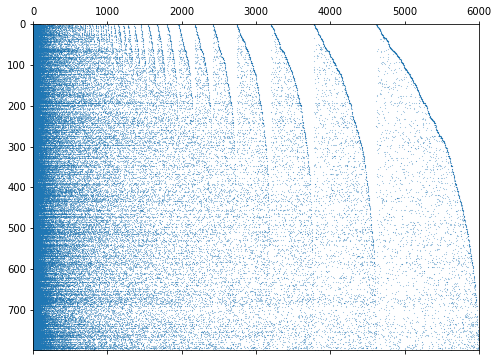

In [33]:
fig = plt.figure()
plt.spy(A, markersize=0.10, aspect = 'auto')
fig.set_size_inches(8,6)
fig.savefig('doc_term_matrix.png', dpi=800)


#Sparse Matrix Representation
Even though we've reduced over 19,000 unique words in our corpus of reviews down to a vocabulary of 6,000 words, that's still a lot! But reviews are generally short, a few hundred words. So most tokens don't appear in a typical review. That means that most of the entries in the document-term matrix will be zeros, and therefore ordinary matrix operations will waste a lot of compute resources multiplying and adding zeros.
We want to maximize the use of space and time by storing and performing matrix operations on our document-term matrix as a sparse matrix. scipy provides tools for efficient sparse matrix representatin and operations.
Loosely speaking, matrix with a high proportion of zeros is called sparse (the opposite of sparse is dense). For sparse matrices, you can save a lot of memory by only storing the non-zero values.
More specifically, a class of matrices is called sparse if the number of non-zero elements is proportional to the number of rows (or columns) instead of being proportional to the product rows x columns. An example is the class of diagonal matrices.
floating point

# Store the document-term matrix in CSR format
i.e. given the TextList object containing the list of reviews, return the three arrays (values, column_indices, row_pointer)

To construct a matrix efficiently, use either dok_matrix or lil_matrix. The lil_matrix class supports basic slicing and fancy indexing with a similar syntax to NumPy arrays. As illustrated below, the COO format may also be used to efficiently construct matrices
To perform manipulations such as multiplication or inversion, first convert the matrix to either CSC or CSR format.
All conversions among the CSR, CSC, and COO formats are efficient, linear-time operations.

#Translate a regular matrix A into CSR format

In [34]:
# construct the document-term matrix in CSR format
# i.e. return (values, column_indices, row_pointer)
def get_doc_term_matrix(text_list, n_terms):
    
    # inputs:
    #    text_list, a TextList object
    #    n_terms, the number of tokens in our IMDb vocabulary
    
    # output: 
    #    the CSR format sparse representation of the document-term matrix in the form of a
    #    scipy.sparse.csr.csr_matrix object

    
    # initialize arrays
    values = []
    column_indices = []
    row_pointer = []
    row_pointer.append(0)
    a1=0

    # from the TextList object
    for _, doc in enumerate(text_list):
        feature_counter = Counter(doc.data)
        column_indices.extend(feature_counter.keys())
        values.extend(feature_counter.values())
        # Tack on N (number of nonzero elements in the matrix) to the end of the row_pointer array
        row_pointer.append(len(values))
    return scipy.sparse.csr_matrix((values, column_indices, row_pointer),
                                   shape=(len(row_pointer) - 1, n_terms),
                                   dtype=int)


In [35]:
%%time
train_doc_term = get_doc_term_matrix(movie_reviews.train.x, len(movie_reviews.vocab.itos))


CPU times: user 133 ms, sys: 2.92 ms, total: 136 ms
Wall time: 136 ms


In [36]:
type(train_doc_term)


scipy.sparse.csr.csr_matrix

In [37]:
train_doc_term.shape

(800, 6008)

In [38]:
train_doc_term.todense()[0:10,-500:-490]

matrix([[0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0]])

In [39]:
train_doc_term[0:10,-6000:-5990]

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 85 stored elements in Compressed Sparse Row format>

In [40]:
movie_reviews.vocab.itos[5]

'xxmaj'

#Reconstruct a regular matrix from its CSR sparse representation
Given a CSR format sparse matrix representation $(\text{values},\text{column_indices}, \text{row_pointer})$ of a $\text{m}\times \text{n}$ matrix $\text{A}$,
how can we recover $\text{A}$?
First create $\text{m}\times \text{n}$ matrix with all zeros. We will recover $\text{A}$ by overwriting the entries in the zeros matrix row by row with the non-zero entries in $\text{A}$ as follows:

In [41]:

def CSR_to_full(values, column_indices, row_ptr, m,n):
    
    A = np.zeros(shape=(m,n),dtype=int)
    for row in range(m):
        if row_ptr is not None:
            A[row,column_indices[row_ptr[row]:row_ptr[row+1]]] = values[row_ptr[row]:row_ptr[row+1]]
            
    return A

In [42]:
def get_doc_term_matrix2(text_list, n_terms):
    
    # inputs:
    #    text_list, a TextList object
    #    n_terms, the number of tokens in our IMDb vocabulary
    
    # output: 
    #    the CSR format sparse representation of the document-term matrix in the form of a
    #    scipy.sparse.csr.csr_matrix object

    
    # initialize arrays
    values = []
    column_indices = []
    row_pointer = []
    row_pointer.append(0)
    a1=0

    # from the TextList object
    for _, doc in enumerate(text_list):
        feature_counter = Counter(doc.data)
        column_indices.extend(feature_counter.keys())
        values.extend(feature_counter.values())
        # Tack on N (number of nonzero elements in the matrix) to the end of the row_pointer array
        row_pointer.append(len(values))
    return column_indices, values, row_pointer

In [43]:
a4,a5,a6=get_doc_term_matrix2(movie_reviews.train.x, len(movie_reviews.vocab.itos))

In [44]:
print(len(a4))
print(len(a5))
print(len(a6))

112409
112409
801


In [45]:
a7=CSR_to_full(a5,a4,a6,len(a6)-1,len(movie_reviews.vocab.itos))

In [46]:
a3 = get_doc_term_matrix(movie_reviews.train.x, len(movie_reviews.vocab.itos))

In [47]:
len(movie_reviews.vocab.itos)

6008

In [48]:
review = movie_reviews.valid.x[1].text
review

"xxbos i saw this movie once as a kid on the late - late show and fell in love with it . \n \n  xxmaj it took 30 + years , but i recently did find it on xxup dvd - it was n't cheap , either - in a xxunk that xxunk in war movies . xxmaj we watched it last night for the first time . xxmaj the audio was good , however it was grainy and had the trailers between xxunk . xxmaj even so , it was better than i remembered it . i was also impressed at how true it was to the play . \n \n  xxmaj the xxunk is around here xxunk . xxmaj if you 're xxunk in finding it , fire me a xxunk and i 'll see if i can get you the xxunk . xxunk"

In [49]:
a3.shape

(800, 6008)

In [50]:
a7.shape

(800, 6008)

In [51]:
np.isclose(a7,a3.todense())

matrix([[ True,  True,  True,  True, ...,  True,  True,  True,  True],
        [ True,  True,  True,  True, ...,  True,  True,  True,  True],
        [ True,  True,  True,  True, ...,  True,  True,  True,  True],
        [ True,  True,  True,  True, ...,  True,  True,  True,  True],
        ...,
        [ True,  True,  True,  True, ...,  True,  True,  True,  True],
        [ True,  True,  True,  True, ...,  True,  True,  True,  True],
        [ True,  True,  True,  True, ...,  True,  True,  True,  True],
        [ True,  True,  True,  True, ...,  True,  True,  True,  True]])

#The bag of words model considers a movie review as equivalent to a list of the counts of all the tokens that it contains. When you do this, you throw away the rich information that comes from the sequential arrangement of the tokens into sentences and paragraphs.




#Nevertheless, even if you are not allowed to read the review but are only given its representation as token counts, you can usually still get a pretty good sense of whether the review was good or bad. How do you do this? By mentally gauging the overall positive or negative sentiment that the collection of words conveys, right?
#The Naive Bayes Classifier is an algorithm that encodes this simple reasoning process mathematically. It is based on two important pieces of information that we can learn from the training set:
#The class priors, i.e. the probabilities that a randomly chosen review will be positive, or negative
#The token likelihoods i.e. how likely is it that a given token would appear in a positive or negative review
#It turns out that this is all the information we need to build a model capable of predicting fairly accurately how any given review will be classified, given its text!


#From the training data we can determine the class priors $p$ and $q$, which are the overall probabilities that a randomly chosen review is in the positive, or negative class, resepectively.
$p=\frac{N^{+}}{N}$
and
$q=\frac{N^{-}}{N}$
#Here $N^{+}$ and $N^{-}$ are the numbers of positive and negative reviews, and $N$ is the total number of reviews in the training set, so that
$N = N^{+} + N^{-}$,
and
$q = 1-p$
8B. Class occurrence counts
#Let $C^{+}_{t}$ and $C^{-}_{t}$ be the occurrence counts of token $t$ in positive and negative reviews, respectively, and $N^{+}$ and $N^{-}$ be the total numbers ofpositive and negative reviews in the data set, respectively.


#Data exploration with class occurrence counts

In [52]:
movie_reviews.y.c


2

In [53]:
movie_reviews.y.classes


['negative', 'positive']

In [54]:
positive = movie_reviews.y.c2i['positive']
negative = movie_reviews.y.c2i['negative']
print(f'Integer representations:  positive: {positive}, negative: {negative}')

Integer representations:  positive: 1, negative: 0


In [55]:
x = train_doc_term
y = movie_reviews.train.y
valid_y = movie_reviews.valid.y
v = movie_reviews.vocab

In [56]:
x.shape

(800, 6008)

In [57]:
C0 = np.squeeze(np.asarray(x[y.items==negative].sum(0)))
C1 = np.squeeze(np.asarray(x[y.items==positive].sum(0)))

In [58]:
#For each vocabulary token, we are summing up how many positive reviews it is in, and how many negative reviews it is in. Here are the occurrence counts for the first 10 tokens in the vocabulary.

print(C1[:10])
print(C0[:10])

[ 6471     0   383     0     0 10267   674    57     0  5260]
[ 7153     0   417     0     0 10741   908    53     1  6150]


In [59]:
ind=v.stoi['love']

In [60]:
ind

142

In [61]:
C1[142]

133

In [62]:
C0[142]

75

#Let's look for an example of a positive review containing the word "hated"

In [63]:
index = v.stoi['hated']
a = np.argwhere((x[:,index] > 0))[:,0]
print(a)
b = np.argwhere(y.items==positive)[:,0]
print(b)
c = list(set(a).intersection(set(b)))[0]
review = movie_reviews.train.x[c]
review.text

[ 15  49 304 351 393 612 695 773]
[  1   3  10  11 ... 787 789 790 797]


'xxbos xxmaj there are numerous films relating to xxup xxunk , but xxmaj mother xxmaj night is quite xxunk among them : xxmaj in this film , we are introduced to xxmaj howard xxmaj campbell ( xxmaj nolte ) , an xxmaj american living in xxmaj berlin and married to a xxmaj german , xxmaj xxunk xxmaj xxunk ( xxmaj lee ) , who decides to accept the role of a spy : xxmaj more specifically , a xxup cia agent xxmaj major xxmaj xxunk ( xxmaj goodman ) recruits xxmaj campbell who becomes a xxmaj nazi xxunk in order to enter the highest xxunk of the xxmaj hitler xxunk . xxmaj however , the deal is that the xxup us xxmaj government will never xxunk xxmaj campbell \'s role in the war for national security reasons , and so xxmaj campbell becomes a hated figure across the xxup us . xxmaj after the war , he tries to xxunk his identity , but the past comes back and xxunk him . xxmaj his only " friend " is xxmaj xxunk , but even he can not do much for the xxunk of events that fall upon poor xxmaj campb

#Get the document-term matrix in CSR format for the validation data


In [64]:
%%time
valid_doc_term = get_doc_term_matrix(movie_reviews.valid.x, len(movie_reviews.vocab.itos))


CPU times: user 34.4 ms, sys: 22 µs, total: 34.5 ms
Wall time: 35.1 ms


In [65]:
type(valid_doc_term)


scipy.sparse.csr.csr_matrix

In [66]:
valid_doc_term.shape

(200, 6008)

#Building a Naive Bayes Classifier for IMDb movie reviews

#Compute the class likelihoods
We compute slightly modified conditional likelihoods, by adding 1 to the numerator and denominator to insure numerically stability.


In [67]:

L1 = (C1+1) / ((y.items==positive).sum() + 1)
L0 = (C0+1) / ((y.items==negative).sum() + 1)

In [68]:
len(L0)

6008

In [69]:
for i in L0:
  print(float(i))

Streaming output truncated to the last 5000 lines.
0.019138755980861243
0.02631578947368421
0.028708133971291867
0.03110047846889952
0.04066985645933014
0.0215311004784689
0.01674641148325359
0.03588516746411483
0.019138755980861243
0.028708133971291867
0.02631578947368421
0.011961722488038277
0.004784688995215311
0.04066985645933014
0.03110047846889952
0.019138755980861243
0.02631578947368421
0.02631578947368421
0.028708133971291867
0.01674641148325359
0.0215311004784689
0.007177033492822967
0.03349282296650718
0.019138755980861243
0.0215311004784689
0.04784688995215311
0.023923444976076555
0.0215311004784689
0.03349282296650718
0.03110047846889952
0.028708133971291867
0.028708133971291867
0.03349282296650718
0.023923444976076555
0.028708133971291867
0.03110047846889952
0.03827751196172249
0.03349282296650718
0.011961722488038277
0.028708133971291867
0.028708133971291867
0.023923444976076555
0.014354066985645933
0.02631578947368421
0.0215311004784689
0.023923444976076555
0.00956937799

In [70]:
R = np.log(L1/L0)
print(R)

[-0.015348  0.084839  0.        0.084839 ...  1.471133 -1.301455 -1.301455 -1.301455]


In [71]:
len(R)

6008

In [72]:
a11=(y.items==positive).sum()
a12=(y.items==negative).sum()


In [73]:
a12


417

#Get the indices of the tokens with the highest and lowest log-count ratios


In [74]:
n_tokens = 10
highest_R = np.argpartition(R, -n_tokens)[-n_tokens:]
lowest_R = np.argpartition(R, n_tokens)[:n_tokens]


In [75]:
print(f'Highest {n_tokens} log-count ratios: {R[list(highest_R)]}\n')
print(f'Lowest {n_tokens} log-count ratios: {R[list(lowest_R)]}')

Highest 10 log-count ratios: [2.569746 2.649788 2.649788 2.649788 2.792889 2.723896 2.723896 2.857428 2.975211 3.029278]

Lowest 10 log-count ratios: [-3.093215 -2.623211 -2.68775  -3.134037 -2.8596   -2.636457 -2.748374 -2.805533 -2.554218 -2.554218]


In [76]:
highest_R

array([1744, 1620, 1666, 1662, 1386, 1529,  795, 1358, 1212, 1143])

In [77]:
[v.itos[k] for k in highest_R]


['han',
 'jabba',
 'gilliam',
 'davies',
 'noir',
 'felix',
 'jimmy',
 'astaire',
 'fanfan',
 'biko']

#Compute the prior probabilities for each class


In [78]:
p = (y.items==positive).mean()
q = (y.items==negative).mean()
print(f'The prior probabilities for positive and negative classes are {p} annd {q}')


The prior probabilities for positive and negative classes are 0.47875 annd 0.52125


#The log probability ratio is
$b = \text{log} \frac{p} {q}$


#b is a measure of the bias, or imbalance in the data set.


In [79]:
b = np.log((y.items==positive).mean() / (y.items==negative).mean())
print(f'The log probability ratio is L = {b}')

The log probability ratio is L = -0.08505123261815539




#Summary: A recipe for the Naive Bayes Classifier
Here is a summary of our procedure for predicting labels with the Naive Bayes Classifier, starting with the training set x and the training labels y
1. Compute the token count vectors
C0 = np.squeeze(np.asarray(x[y.items==negative].sum(0)))
C1 = np.squeeze(np.asarray(x[y.items==positive].sum(0)))

2. Compute the token class likelihood vectors
L0 = (C0+1) / ((y.items==negative).sum() + 1)
L1 = (C1+1) / ((y.items==positive).sum() + 1)

3. Compute the log-count ratios vector
R = np.log(L1/L0)

4. Compute the bias term
b = np.log((y.items==positive).mean() / (y.items==negative).mean())

5. The Naive Bayes model consists of the log-counts vector $\textbf{R}$ and the bias $\textbf{b}$
6. Predict the movie review labels from a linear transformation of the log-count ratios vector:
preds = (W @ R + b) > 0,
where the weights matrix W = valid_doc_term.sign() is the binarized valid_doc_term matrix whose rows are the binarized embedding vectors for the movie reviews for which you want to predict ratings.

#Working with the full IMDb data set
Now that we have our approach working on a smaller sample of the data, we can try using it on the full dataset.



#Download the data

In [80]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/test')]

In [81]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat')]

#Preprocess the data
Attempt to split and label the data fails most of the time, throwing a BrokenProcessPool error; we apply a brute force approach, trying repeatedly until we succeed. Takes 10 minutes if it goes on the first try.

In [82]:
%%time
# throws `BrokenProcessPool' Error sometimes. Keep trying `till it works!
count = 0
error = True
while error:
    try: 
        # Preprocessing steps
        reviews_full = (TextList.from_folder(path)
             #  Make a `TextList` object that is a list of `WindowsPath` objects, 
             #     each of which contains the full path to one of the data files.
             .split_by_folder(valid='test')
             # Generate a `LabelLists` object that splits files by training and validation folders
             # Note: .label_from_folder in next line causes the `BrokenProcessPool` error
             .label_from_folder(classes=['neg', 'pos']))
             # Create a `CategoryLists` object which contains the data and
             #   its labels that are derived from folder names
        error = False
        print(f'failure count is {count}\n')    
    except: # catch *all* exceptions
        # accumulate failure count
        count = count + 1
        print(f'failure count is {count}')

failure count is 0

CPU times: user 7.63 s, sys: 1.36 s, total: 8.99 s
Wall time: 1min 15s


#Create document-term matrices for training and validation sets.

In [83]:
%%time
valid_doc_term = get_doc_term_matrix(reviews_full.valid.x, len(reviews_full.vocab.itos))


CPU times: user 4.12 s, sys: 132 ms, total: 4.26 s
Wall time: 4.15 s


In [84]:
%%time
train_doc_term = get_doc_term_matrix(reviews_full.train.x, len(reviews_full.vocab.itos))

CPU times: user 4.15 s, sys: 78 ms, total: 4.23 s
Wall time: 4.16 s


#Save the data
When storing data like this, always make sure it's included in your .gitignore file


In [85]:
scipy.sparse.save_npz("train_doc_term.npz", train_doc_term)


In [86]:
scipy.sparse.save_npz("valid_doc_term.npz", valid_doc_term)



In [87]:
with open('reviews_full.pickle', 'wb') as handle:
    pickle.dump(reviews_full, handle, protocol=pickle.HIGHEST_PROTOCOL)

In the future, we'll just be able to load our data:


In [88]:
train_doc_term = scipy.sparse.load_npz("train_doc_term.npz")
valid_doc_term = scipy.sparse.load_npz("valid_doc_term.npz")
with open('reviews_full.pickle', 'rb') as handle:
    pickle.load(handle)

#Understanding Fastai's API$^\dagger$ for text data sets
$^\dagger$API $\equiv$ Application Programming Interface

reviews_full is a LabelLists object, which contains LabelList objects train, valid and potentially test

In [89]:
type(reviews_full)
type(reviews_full.valid)


fastai.data_block.LabelList

In [90]:
print(reviews_full.vocab)


In [91]:
full_vocab = reviews_full.vocab

In [92]:
full_vocab.itos[100:110]

['bad',
 'people',
 'will',
 'other',
 'also',
 'into',
 'first',
 'great',
 'because',
 'how']

In [93]:
reviews_full.valid

LabelList (25000 items)
x: TextList
xxbos xxmaj what to say about a movie like xxmaj rock xxmaj star ? a lot actually ! xxmaj this is the type of movie that is almost xxunk made for the critics to slam . xxmaj it is also a movie i , as a xxup major xxmaj hard xxmaj rock fan enjoyed - no - loved actually - while all the while being very consciously aware of its many flaws and that the movie , while a decent effort in some respects missed the chance it had to escape into greatness and become a rock movie classic . xxmaj oh well xxrep 4 . 
 
  i loved this movie - and would see it again and again - but i know that 's purely based on my own personal tastes - xxmaj rock xxmaj star is a movie that will appeal to anyone who has experienced elements of the rock or hard rock lifestyle and wants to go down the road to nostalgia . xxmaj it was a great time for metal heads . xxmaj and it 's nice to have a movie that effectively captures xxunk forgot by many non - rock fans . ) time effectively , a

In [94]:
reviews_full.valid.x[0].text

'xxbos xxmaj what to say about a movie like xxmaj rock xxmaj star ? a lot actually ! xxmaj this is the type of movie that is almost xxunk made for the critics to slam . xxmaj it is also a movie i , as a xxup major xxmaj hard xxmaj rock fan enjoyed - no - loved actually - while all the while being very consciously aware of its many flaws and that the movie , while a decent effort in some respects missed the chance it had to escape into greatness and become a rock movie classic . xxmaj oh well xxrep 4 . \n \n  i loved this movie - and would see it again and again - but i know that \'s purely based on my own personal tastes - xxmaj rock xxmaj star is a movie that will appeal to anyone who has experienced elements of the rock or hard rock lifestyle and wants to go down the road to nostalgia . xxmaj it was a great time for metal heads . xxmaj and it \'s nice to have a movie that effectively captures xxunk forgot by many non - rock fans . ) time effectively , as i think that xxmaj rock xxmaj

In [95]:
reviews_full.valid.x[0].data

array([  2,   5,  65,  15, ..., 129,  14, 198,  10])

In [96]:
reviews_full.valid.x.items

array([array([  2,   5,  65,  15, ..., 129,  14, 198,  10]), array([  2,   5, 156,  73, ..., 260,  54,  17,  10]),
       array([  2,   5, 467, 526, ...,  37,  43, 695,  10]), array([  2,   5, 151, 181, ...,   0,   7, 235,  49]), ...,
       array([  2,   5, 620,  11, ...,  96,   6,   0,  10]),
       array([   2,    5,  121,  168, ...,   65,   13, 8087,   10]),
       array([   2,    5,   71,   19, ...,   24, 8390, 2405,   10]),
       array([   2,   19,  314,   20, ..., 1339,   60,   60,   10])], dtype=object)

In [97]:
reviews_full.valid.y[0]

Category 1

In [98]:
reviews_full.valid.y.items

array([1, 1, 1, 1, ..., 0, 0, 0, 0])

In [99]:
len(reviews_full.train), len(reviews_full.valid)

(25000, 25000)

#The Naive Bayes classifier with the full IMDb dataset


In [100]:
x=train_doc_term
y=reviews_full.train.y
valid_y = reviews_full.valid.y.items


In [101]:
positive = y.c2i['pos']
negative = y.c2i['neg']


In [102]:
C0 = np.squeeze(np.asarray(x[y.items==negative].sum(0)))
C1 = np.squeeze(np.asarray(x[y.items==positive].sum(0)))


In [103]:
C0


array([26553,     0, 12500,     0, ...,     0,     0,     0,     0], dtype=int64)

In [104]:
C1

array([28357,     0, 12500,     0, ...,     0,     0,     0,     0], dtype=int64)

#Token likelihoods conditioned on class


In [105]:
L1 = (C1+1) / ((y.items==positive).sum() + 1)
L0 = (C0+1) / ((y.items==negative).sum() + 1)


In [106]:
h1=((y.items==positive).sum())

In [107]:
h1

12500

In [108]:
R = np.log(L1/L0)


#Check that log-count ratios are negative for words with negative sentiment and positive for words with positive sentiment!

In [109]:
R[full_vocab.stoi['hated']]


-0.7133498878774648

In [110]:
R[full_vocab.stoi['loved']]


1.1563661500586044

In [111]:
R[full_vocab.stoi['liked']]


0.4418327522790391

In [112]:
R[full_vocab.stoi['worst']]


-2.2826243504315076

In [113]:
R[full_vocab.stoi['best']]


0.7227894355186196

In [114]:
b = np.log((y.items==positive).mean() / (y.items==negative).mean())
print(f'The bias term b is {b}')


The bias term b is 0.0


#We get much better accuracy this time, because of the larger training set.


# predict labels for the validation data


In [115]:
W = valid_doc_term.sign()
preds = (W @ R + b) > 0
valid_accuracy = (preds == valid_y).mean()
print(f'Validation accuracy is {valid_accuracy} for the full data set')

Validation accuracy is 0.83304 for the full data set


#The Logistic Regression classifier with the full IMBb data set¶
With the sci-kit learn library, we can fit logistic a regression model where the features are the unigrams. Here $C$ is a regularization parameter.

In [116]:
from sklearn.linear_model import LogisticRegression


In [117]:
m = LogisticRegression(C=0.1, dual=False,solver = 'liblinear')
# 'liblinear' and 'newton-cg' solvers both get 0.88328 accuracy
# 'sag', 'saga', and 'lbfgs' don't converge
m.fit(train_doc_term, y.items.astype(int))
preds = m.predict(valid_doc_term)
valid_accuracy = (preds==valid_y).mean()
print(f'Validation accuracy is {valid_accuracy} using the full doc-term matrix')

Validation accuracy is 0.88312 using the full doc-term matrix


#Using the binarized document-term matrix gets a slightly higher accuracy:

In [118]:
m = LogisticRegression(C=0.1, dual=False,solver = 'liblinear')
m.fit(train_doc_term.sign(), y.items.astype(int))
preds = m.predict(valid_doc_term.sign())
valid_accuracy = (preds==valid_y).mean()
print(f'Validation accuracy is {valid_accuracy} using the binarized doc-term matrix')

Validation accuracy is 0.88548 using the binarized doc-term matrix
